<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/tweet_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


Postup:

1. načítať dáta - krátky pohľad na dáta, počet unikátnych userov, tweetov
2. vytvoriť data.frame s ktorým budem daľej pracovať
3. embedding pre users, tweets
4. predikcia - doplnenie tabuľky
5. pokúsiť sa využiť bias na usera a movie - pokúsiť sa zlepšiť hodnotu 


In [8]:
from google.colab import files 

uploaded = files.upload()

Saving fake_v1_100x252.csv to fake_v1_100x252.csv


In [9]:
df = pd.read_csv(r'/content/fake_v1_100x252.csv')

In [10]:
df.head(6)

,Unnamed: 0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252
0,user1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,user2,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,6.0,5.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,...,NaN,3.0,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,user3,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,4.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user4,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
5,user6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [11]:
n_users = df.iloc[:,0].values.shape[0]
n_tweets = df.columns[1:].shape[0]

percentage = df.isna().sum().values.sum() / (n_tweets * n_users)

print("Shape of data matrix is %d - \"number of unique users\" and %d - \"number of unique tweets\"" % (n_users, n_tweets))
print("Percentage of unlabeled tweets in the whole dataset is %.2f%% " %(100*percentage) )

Shape of data matrix is 100 - "number of unique users" and 252 - "number of unique tweets"
Percentage of unlabeled tweets in the whole dataset is 80.16% 


In [12]:
df_new = pd.DataFrame(columns = ['user_id','tweet_id','ratings'])
df_new

,user_id,tweet_id,ratings


In [13]:
for i in range(0,n_users):
  for j in range(1,n_tweets+1):
     
    if pd.isna(df.iloc[i,j]) == False:
      df_new = df_new.append({'user_id':i+1,'tweet_id':j,'ratings':df.iloc[i,j]},ignore_index=True)

df_new

,user_id,tweet_id,ratings
0,1.0,1.0,4.0
1,1.0,21.0,5.0
2,1.0,24.0,5.0
3,1.0,27.0,5.0
4,1.0,40.0,4.0
...,...,...,...
4995,100.0,234.0,4.0
4996,100.0,237.0,3.0
4997,100.0,248.0,5.0
4998,100.0,249.0,5.0


In [67]:
def embedding_input(name,n_in,n_out):
  inp = layers.Input(shape = (1,) )
  return inp, layers.Embedding(n_in, n_out, input_length = 1, name = name)(inp)

In [85]:
from keras.models import Model

n_out = 15

inp = layers.Input(dtype= 'int64',shape = [1] )
u = layers.Embedding(n_users+1, n_out)(inp)
drop2 = layers.Dropout(0.7)(u)
user_vec = layers.Flatten()(drop2)

inp1 = layers.Input(dtype= 'int64',shape = [1] )
v = layers.Embedding(n_tweets+1, n_out)(inp1)
drop1 = layers.Dropout(0.7)(v)
tweet_vec = layers.Flatten()(drop1)

prod = layers.Dot(axes = 1)([user_vec, tweet_vec])

pred = layers.Dense(1 , activation = 'relu')(prod)
model = Model([inp,inp1], pred)


model.compile(loss = 'mse',metrics = ['mae'] ,optimizer = 'rmsprop')

model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 1, 15)        1515        input_11[0][0]                   
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 1, 15)        3795        input_12[0][0]                   
______________________________________________________________________________________

In [86]:
history = model.fit([df_new.user_id,df_new.tweet_id], y = df_new.ratings, validation_split = 0.2, epochs = 40, batch_size = 32)

Epoch 1/40
125/125 [==============================] - 0s 2ms/step - loss: 17.0191 - mae: 4.0753 - val_loss: 16.2169 - val_mae: 3.9919
Epoch 2/40
125/125 [==============================] - 0s 1ms/step - loss: 16.0123 - mae: 3.9499 - val_loss: 15.2370 - val_mae: 3.8672
Epoch 3/40
125/125 [==============================] - 0s 1ms/step - loss: 15.0425 - mae: 3.8253 - val_loss: 14.2878 - val_mae: 3.7425
Epoch 4/40
125/125 [==============================] - 0s 1ms/step - loss: 14.1037 - mae: 3.7006 - val_loss: 13.3705 - val_mae: 3.6179
Epoch 5/40
125/125 [==============================] - 0s 2ms/step - loss: 13.1960 - mae: 3.5757 - val_loss: 12.4841 - val_mae: 3.4932
Epoch 6/40
125/125 [==============================] - 0s 2ms/step - loss: 12.3200 - mae: 3.4509 - val_loss: 11.6294 - val_mae: 3.3686
Epoch 7/40
125/125 [==============================] - 0s 1ms/step - loss: 11.4740 - mae: 3.3261 - val_loss: 10.8051 - val_mae: 3.2440
Epoch 8/40
125/125 [==============================] - 0s 1ms/s

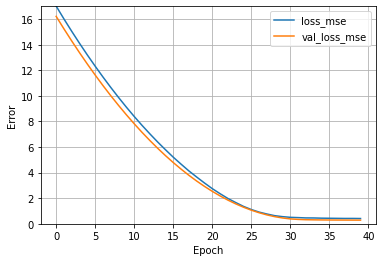

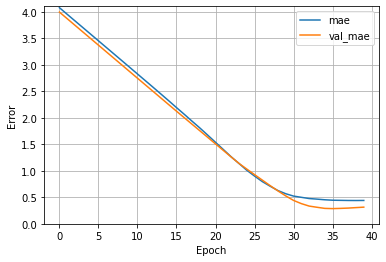

In [87]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss_mse')
  plt.plot(model.history['val_loss'], label='val_loss_mse')
  plt.ylim([0, 17])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['mae'], label='mae')
  plt.plot(model.history['val_mae'], label='val_mae')
  plt.ylim([0, 4.1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(history)

In [88]:
df_filled = pd.DataFrame(columns = list(df.columns[1:253]))
df_filled

,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,tweet40,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252


In [89]:
tweet_list = ["tweet"+ str(i) for i in range(1,253)]

for i in range(n_users):
    
    user_list = []
    if i % 10 == 0:
      print("Number of counted percent of all is %0.2f %%" %i )
    
    for j in range(1,n_tweets+1):
      
      if pd.isna(df.iloc[i,j]):
        user_list.append(model.predict([np.array([i]),np.array([j])])[0][0])
      
      else:
        user_list.append(df.iloc[i,j])

    temp_dict = dict()
    temp_dict = dict(zip(tweet_list,user_list))
    df_filled = df_filled.append(temp_dict,ignore_index=True)


round(df_filled,2)

Number of counted percent of all is 0.00 %
Number of counted percent of all is 10.00 %
Number of counted percent of all is 20.00 %
Number of counted percent of all is 30.00 %
Number of counted percent of all is 40.00 %
Number of counted percent of all is 50.00 %
Number of counted percent of all is 60.00 %
Number of counted percent of all is 70.00 %
Number of counted percent of all is 80.00 %
Number of counted percent of all is 90.00 %


,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,tweet40,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252
0,4.00,4.06,4.07,4.06,4.05,4.06,4.07,4.06,4.07,4.07,4.06,4.06,4.06,4.06,4.06,4.07,4.06,4.07,4.06,4.06,5.00,4.06,4.08,5.00,4.05,4.07,5.00,4.06,4.06,4.06,4.07,4.07,4.07,4.06,4.07,4.06,4.06,4.07,4.06,4.00,...,4.07,6.00,4.07,4.07,4.07,4.00,4.06,4.08,4.07,4.07,4.06,4.07,4.07,4.06,4.07,4.00,4.06,4.06,5.00,4.06,4.06,4.07,4.08,4.06,4.06,4.06,6.00,4.07,4.06,4.06,3.00,3.00,4.06,4.07,4.07,4.08,4.06,4.07,4.06,5.00
1,4.21,4.15,4.21,5.00,4.18,5.00,4.12,4.13,4.18,4.21,6.00,5.00,3.00,4.14,4.00,4.20,4.15,4.16,4.16,4.00,4.30,4.18,4.20,3.00,3.00,4.15,4.29,4.17,5.00,4.22,4.21,5.00,4.15,4.11,4.15,4.00,4.14,4.14,5.00,4.17,...,4.16,3.00,4.17,3.00,4.20,4.13,6.00,4.27,4.17,4.18,4.10,4.15,4.17,4.12,3.00,4.00,4.00,4.17,4.20,4.17,4.16,4.15,4.22,3.00,4.18,4.12,4.23,4.10,4.12,6.00,4.19,4.00,4.15,4.18,4.17,4.21,3.00,4.12,4.21,4.17
2,4.15,4.00,4.16,4.13,4.10,4.12,4.00,4.07,4.12,4.16,4.10,4.11,4.00,4.09,4.09,4.13,4.00,4.14,4.11,4.09,4.18,4.15,4.14,4.15,4.08,4.12,4.18,4.11,4.13,4.14,4.18,4.15,4.14,4.11,4.14,4.09,4.10,4.00,4.16,4.00,...,4.13,4.00,5.00,4.12,5.00,4.13,4.16,4.19,4.16,4.15,4.10,4.13,4.14,4.10,4.19,4.00,4.12,4.12,4.13,4.00,4.12,4.10,4.16,4.14,4.14,4.10,4.15,4.11,4.16,4.16,4.13,4.15,4.09,4.15,4.12,4.16,4.17,4.08,4.17,4.14
3,4.00,4.11,4.17,4.11,4.11,4.00,4.09,4.00,4.14,4.00,4.12,4.12,4.09,4.00,4.00,4.14,4.00,4.10,4.11,4.09,4.00,4.14,4.16,4.15,4.00,4.10,4.20,4.00,4.10,4.15,4.15,4.13,4.11,4.09,4.14,4.07,4.00,4.12,4.16,4.12,...,4.12,4.14,4.13,4.00,4.00,4.13,4.16,4.20,4.13,4.00,4.09,4.12,4.13,4.09,4.15,4.00,4.11,4.13,4.00,4.00,4.12,4.12,4.15,4.13,4.14,4.09,4.15,4.09,4.09,5.00,4.13,4.00,4.10,4.13,4.13,4.17,4.12,4.09,4.15,4.13
4,4.10,4.08,5.00,4.08,4.10,4.09,4.08,4.07,4.09,4.10,4.09,4.09,4.07,4.07,4.07,4.10,4.09,5.00,4.09,4.06,4.00,4.08,4.00,4.12,5.00,4.09,4.00,4.10,4.08,4.10,6.00,4.09,4.08,4.08,4.08,4.07,4.09,4.07,4.08,4.08,...,4.08,4.00,4.09,4.10,4.10,4.06,4.10,4.11,4.00,4.09,5.00,4.08,4.08,4.07,4.09,4.09,5.00,4.08,5.00,4.09,4.08,4.08,5.00,4.08,4.10,3.00,4.10,4.07,4.07,4.00,4.08,4.11,4.00,4.00,4.09,4.00,4.08,4.07,4.10,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.05,4.05,4.04,4.05,4.04,4.06,4.00,4.05,5.00,4.04,4.04,4.05,4.05,4.05,4.00,4.00,4.04,4.00,4.04,4.05,4.03,4.04,4.03,5.00,4.05,4.05,4.03,4.04,4.05,4.03,5.00,4.05,4.00,5.00,3.00,4.05,4.04,4.04,4.04,3.00,...,4.05,4.04,4.00,4.04,5.00,4.05,3.00,4.03,4.06,4.04,4.05,4.05,4.00,4.05,4.03,4.05,4.00,4.05,4.04,4.00,4.04,4.04,4.04,4.05,4.05,4.05,5.00,4.06,4.07,3.00,4.04,4.00,4.06,4.04,4.00,5.00,4.04,4.06,4.04,4.05
96,4.06,4.00,4.00,4.05,4.05,4.00,4.05,4.00,4.04,4.00,4.00,4.06,4.07,4.06,4.05,4.05,4.06,4.06,4.06,4.05,4.06,4.07,4.06,4.00,4.06,4.04,4.04,4.00,4.06,4.05,4.07,4.00,4.04,4.06,4.00,4.00,4.06,4.06,4.00,4.05,...,4.06,4.00,4.06,4.05,4.00,4.06,4.06,4.06,4.05,4.06,4.06,4.05,4.00,4.04,4.04,4.00,4.07,4.06,4.07,4.06,4.00,4.05,4.05,4.07,4.06,4.00,4.00,4.05,4.05,4.06,4.05,4.05,4.00,4.00,4.07,4.00,4.07,4.04,4.07,4.05
97,4.05,4.05,4.05,4.04,4.06,4.06,4.04,4.00,4.05,4.06,4.00,4.06,4.05,4.07,4.06,4.05,4.05,4.06,4.06,4.06,4.06,4.07,4.05,4.06,4.06,4.05,4.05,4.06,4.05,4.05

In [109]:
df_filled = round(df_filled,3)

df_filled.insert(loc=0, column='Users', value=["User"+ str(i) for i in range(1,101)])
df_filled

,Users,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252
0,User1,4.000,4.061,4.068,4.061,4.052,4.063,4.065,4.056,4.068,4.073,4.057,4.062,4.061,4.062,4.064,4.070,4.064,4.066,4.056,4.057,5.000,4.061,4.078,5.000,4.051,4.066,5.000,4.064,4.058,4.060,4.069,4.073,4.074,4.059,4.070,4.058,4.058,4.067,4.065,...,4.069,6.000,4.075,4.074,4.068,4.000,4.063,4.078,4.073,4.071,4.061,4.070,4.069,4.058,4.073,4.000,4.063,4.062,5.000,4.065,4.056,4.069,4.077,4.059,4.064,4.059,6.000,4.066,4.060,4.060,3.000,3.000,4.058,4.067,4.066,4.079,4.058,4.069,4.059,5.000
1,User2,4.213,4.150,4.214,5.000,4.179,5.000,4.124,4.127,4.179,4.213,6.000,5.000,3.000,4.139,4.000,4.204,4.152,4.157,4.160,4.000,4.301,4.177,4.198,3.000,3.000,4.150,4.292,4.170,5.000,4.224,4.209,5.000,4.145,4.113,4.153,4.000,4.139,4.137,5.000,...,4.156,3.000,4.174,3.000,4.200,4.130,6.000,4.268,4.167,4.177,4.105,4.153,4.166,4.117,3.000,4.000,4.000,4.166,4.200,4.171,4.164,4.151,4.220,3.000,4.185,4.118,4.227,4.096,4.118,6.000,4.188,4.000,4.148,4.175,4.166,4.209,3.000,4.118,4.210,4.173
2,User3,4.151,4.000,4.158,4.134,4.104,4.124,4.000,4.072,4.118,4.156,4.105,4.110,4.000,4.091,4.086,4.132,4.000,4.141,4.112,4.095,4.185,4.145,4.143,4.151,4.077,4.117,4.178,4.114,4.128,4.136,4.182,4.148,4.135,4.112,4.142,4.088,4.102,4.000,4.159,...,4.131,4.000,5.000,4.123,5.000,4.132,4.164,4.195,4.159,4.147,4.102,4.133,4.137,4.101,4.187,4.000,4.118,4.118,4.134,4.000,4.115,4.105,4.160,4.136,4.143,4.097,4.146,4.109,4.160,4.161,4.134,4.152,4.086,4.154,4.118,4.158,4.171,4.079,4.165,4.142
3,User4,4.000,4.106,4.169,4.111,4.114,4.000,4.094,4.000,4.136,4.000,4.118,4.120,4.094,4.000,4.000,4.138,4.000,4.102,4.108,4.092,4.000,4.138,4.159,4.154,4.000,4.097,4.200,4.000,4.102,4.152,4.154,4.134,4.114,4.091,4.145,4.071,4.000,4.125,4.157,...,4.120,4.142,4.133,4.000,4.000,4.128,4.158,4.195,4.130,4.000,4.090,4.117,4.126,4.091,4.150,4.000,4.108,4.127,4.000,4.000,4.118,4.118,4.154,4.133,4.137,4.090,4.152,4.089,4.093,5.000,4.128,4.000,4.103,4.128,4.134,4.166,4.121,4.091,4.152,4.128
4,User5,4.104,4.078,5.000,4.076,4.099,4.094,4.079,4.069,4.086,4.096,4.088,4.091,4.066,4.074,4.067,4.097,4.088,5.000,4.093,4.062,4.000,4.077,4.000,4.119,5.000,4.089,4.000,4.099,4.075,4.103,6.000,4.085,4.079,4.080,4.075,4.074,4.087,4.072,4.078,...,4.081,4.000,4.085,4.095,4.100,4.061,4.100,4.106,4.000,4.089,5.000,4.084,4.079,4.071,4.091,4.093,5.000,4.081,5.000,4.092,4.082,4.085,5.000,4.081,4.096,3.000,4.104,4.069,4.071,4.000,4.084,4.114,4.000,4.000,4.086,4.000,4.076,4.074,4.102,4.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,User96,4.047,4.045,4.037,4.053,4.040,4.061,4.000,4.050,5.000,4.039,4.042,4.050,4.048,4.049,4.000,4.000,4.043,4.000,4.040,4.054,4.033,4.040,4.032,5.000,4.053,4.051,4.032,4.044,4.049,4.034,5.000,4.051,4.000,5.000,3.000,4.050,4.044,4.040,4.041,...,4.048,4.036,4.000,4.038,5.000,4.051,3.000,4.030,4.059,4.043,4.046,4.048,4.000,4.051,4.032,4.051,4.000,4.046,4.045,4.000,4.043,4.044,4.040,4.046,4.053,4.048,5.000,4.062,4.066,3.000,4.043,4.000,4.056,4.044,4.000,5.000,4.037,4.057,4.038,4.046
96,User97,4.059,4.000,4.000,4.047,4.048,4.000,4.047,4.000,4.044,4.000,4.000,4.06